<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Постановка-задачи" data-toc-modified-id="Постановка-задачи-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Постановка задачи</a></span><ul class="toc-item"><li><span><a href="#Цель-проекта" data-toc-modified-id="Цель-проекта-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Цель проекта</a></span></li><li><span><a href="#Задачи-проекта" data-toc-modified-id="Задачи-проекта-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Задачи проекта</a></span></li></ul></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Выводы" data-toc-modified-id="Выводы-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#Случайный-лес" data-toc-modified-id="Случайный-лес-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Случайный лес</a></span></li><li><span><a href="#LightGBM" data-toc-modified-id="LightGBM-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>LightGBM</a></span></li><li><span><a href="#CatBoost" data-toc-modified-id="CatBoost-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>CatBoost</a></span></li><li><span><a href="#Линейная-регрессия" data-toc-modified-id="Линейная-регрессия-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Линейная регрессия</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Анализ-моделей" data-toc-modified-id="Анализ-моделей-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Анализ моделей</a></span><ul class="toc-item"><li><span><a href="#Выводы" data-toc-modified-id="Выводы-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Общие-выводы" data-toc-modified-id="Общие-выводы-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общие выводы</a></span></li></ul></div>

# Определение стоимости автомобилей

## Постановка задачи

Сервис по продаже автомобилей разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В вашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Вам нужно построить модель для определения стоимости. 

Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.

### Цель проекта

Построить модель для определения стоимости автомобиля

### Задачи проекта
Для достижения цели необходимо решить следующие задачи:
1. Подготовить исходные данные
    - Избавиться от незначащих признаков
    - Удалить выбросы 
    - Проверить признаки на коллинеарность.
2. Обучить модели
    - Выбрать модели для сравнения (`RandomForestRegressor`, `LGBMRegressor`, `CatBoostRegressor`, `LinearRegression`)
    - Заполнить пропуски (так как не все модели работают с пропусками)
    - Преобразовать категориальные данные для работы моделей (не все модели могут работать с пропусками)
    - Перебрать некоторые параметры моделей для достижения лучшей метрики *RMSE* 
3. Провести анализ работы моделей
    - Оценить время работы моделей с лучшими параметрами из списка
    - Сравнить время обучения лучших моделей на тренировочной и тестовой выборках
    - Сравнить качество обучения метрикой *RMSE* на тренировочной и тестовой выборках
    - Сделать вывод с рекомендациями какую модель лучше использовать



## Подготовка данных

Импортируем библиотеки

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, GridSearchCV, ParameterGrid
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Читаем файл

In [2]:
df = pd.read_csv('/datasets/autos.csv')

Выведем информацию о таблице

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

В таблице 354369 записи, 16 столбцов. Есть пропуски. Типы данных  - *int64* и *object*. Даты имеют тип *object*. Даже у графы `NotRepaired` - в принципе бинарного признака строковый тип *object*.

Выведем первые 5 строк таблицы.

In [4]:
df.head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


Согласно заданию столбцы имеют следующее назначение 

Признаки
- `DateCrawled` — дата скачивания анкеты из базы
- `VehicleType` — тип автомобильного кузова
- `RegistrationYear` — год регистрации автомобиля
- `Gearbox` — тип коробки передач
- `Power` — мощность (л. с.)
- `Model` — модель автомобиля
- `Kilometer` — пробег (км)
- `RegistrationMont` — месяц регистрации автомобиля
- `FuelType` — тип топлива
- `Brand` — марка автомобиля
- `NotRepaired` — была машина в ремонте или нет
- `DateCreated` — дата создания анкеты
- `NumberOfPictures` — количество фотографий автомобиля
- `PostalCode` — почтовый индекс владельца анкеты (пользователя)
- `LastSeen` — дата последней активности пользователя

Целевой признак
`Price` — цена (евро)

Посмотрим, есть ли дубликаты

In [5]:
df.duplicated().sum()

4

Да, дубликаты есть. Маловероятно, что при таком построении таблицы возникли записи с идентичными наборами параметров. Удалим дубликаты и обновим индекс

In [5]:
df = df.drop_duplicates().reset_index(drop=True)

Теперь выведем статистику по числовым признакам.

In [6]:
df.describe()

,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,NumberOfPictures,PostalCode
count,354365.000000,354365.000000,354365.000000,354365.000000,354365.000000,354365.0,354365.000000
mean,4416.679830,2004.234481,110.093816,128211.363989,5.714650,0.0,50508.503800
std,4514.176349,90.228466,189.851330,37905.083858,3.726432,0.0,25783.100078
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


Построим гистограммы для удобства.

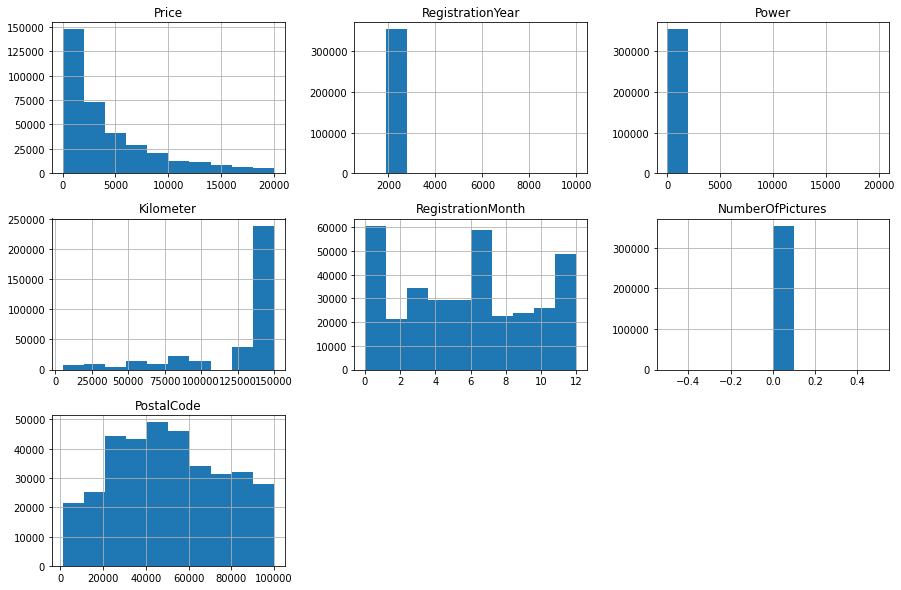

In [7]:
df.hist(figsize = (15,10));

- Сразу бросается в глаза, что `NumberOfPictures` равны нулю.
- `Kilometer`видно, что максимальный пробег - 150000км. Это не так и много. Вероятно просто стоит ограничение на вводе значений и нельзя указать больше 150000км. Таком образом при значении более 150000 автомобиль попадает в категорию *150 тыс. и более*.
- `PostalCode` - более-менее нормальне распределение без отрицательных и нулевых значений.
- `Power` - Основная масса машин сосредоточена в области небольших значений, но есть и явные выбросы, так как 1000 л.с. уже огромная мощность, а значение 0 -вызывает вопросы. Здесь понадобится доп. исследование.
- `Price` - большое к-во околонулевых значений. Возможно кто-то готов отдать машину даром, за 0 евро. Также проведём доп. исследование.
- `RegistrationMonth` - неожиданно появление нулевых значений месяца. Вероятно это указывали тогда, когда месяц не определён. Так как большее значение имеет год, а не месяц, то оставим нулевые значения месяца.
- `RegistrationYear` - также неожиданное появление больших значений года регистрации. Требуется доп. исследование

Для начала удалим столбец с фотографиями, как незначащий признак.

In [8]:
df = df.drop(['NumberOfPictures'], axis=1)

Далее попробуем разобраться с целевым признаком `Price`. Посмотрим гистограмму в области значений меньше 10 евро.

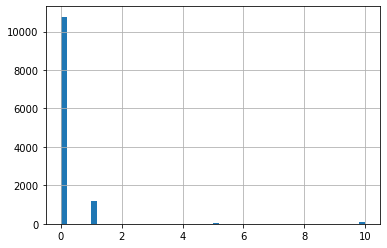

In [9]:
df[df['Price']<=10]['Price'].hist(bins=50);

Много значений 0 и 1 евро.

In [10]:
(df['Price'] <=1).sum()/len(df)

0.0337533334273983

Маловероятно, что в бизнес-задачи входит получения 0 или 1 как результата оценки стоимости. Вероятно 0 и 1 в этой графе стоит трактовать как **цена не указана**, а это значит, что фактически цена не указана и эти записи стоит удалить из датасета. Их около 3%, что в принципе считаю не критичным для удаления.

In [11]:
df = df.drop(df[df['Price']<=1].index).reset_index(drop=True)

Посмотрим на даты скачивания анкет

In [12]:
df['DateCrawled'].sort_values()

318366    2016-03-05 14:06:22
213050    2016-03-05 14:06:23
313806    2016-03-05 14:06:24
96489     2016-03-05 14:06:24
170811    2016-03-05 14:06:24
                 ...         
197266    2016-04-07 14:36:53
51931     2016-04-07 14:36:54
290833    2016-04-07 14:36:55
328173    2016-04-07 14:36:56
87646     2016-04-07 14:36:58
Name: DateCrawled, Length: 342404, dtype: object

Все анкеты скачены в в марте-апреле 2016 года. Посмотрим, сколько автомобилей имеют год регистрации после 2016.

In [13]:
len(df[df['RegistrationYear'] > 2016])

13713

Таких значений достаточно много. Сложно объяснить, почему год регистрации автомобилей больше года скачивания из базы. Возможно это особенность работы системы. Посмотрим на к-во автомобилей, имеющих регистрацию до 1900 года и после 2022.

In [14]:
len(df[(df['RegistrationYear'] > 2022) | (df['RegistrationYear'] < 1900)])

131

Таких записей не много. Удалим их.

In [15]:
df=df.drop(df[(df['RegistrationYear'] > 2022) | (df['RegistrationYear'] < 1900)].index).reset_index(drop=True)

Посмотрим на марки автомобилей с мощностью более 1000 л.с.

In [17]:
df[df['Power']>=1000].groupby('Brand')['Model'].count()

Brand
alfa_romeo         2
audi              17
bmw               26
chevrolet          2
chrysler           1
citroen            8
daewoo             1
fiat               5
ford              19
honda              0
kia                2
lancia             1
mazda              1
mercedes_benz     22
mini               3
mitsubishi         3
nissan             3
opel              41
peugeot            3
renault           15
seat               4
skoda              2
smart              2
sonstige_autos     0
suzuki             1
toyota             4
volkswagen        59
volvo              3
Name: Model, dtype: int64

Видно, что производителей суперкаров нет и количество таких автомобилей не большое. Выведем первый 5 строк

In [18]:
df[df['Power']>=1000].head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,PostalCode,LastSeen
1756,2016-03-22 20:52:00,3200,small,2004,manual,1398,corolla,5000,6,petrol,toyota,no,2016-03-22 00:00:00,22043,2016-03-22 21:43:26
5138,2016-03-29 19:44:48,500,wagon,1999,manual,1001,astra,150000,7,petrol,opel,NaN,2016-03-29 00:00:00,33154,2016-04-06 05:44:36
7397,2016-04-02 19:25:25,1499,small,1999,manual,7515,lupo,150000,4,petrol,volkswagen,NaN,2016-04-02 00:00:00,65830,2016-04-06 11:46:49
7455,2016-04-02 11:48:54,1500,small,2000,manual,1400,NaN,150000,0,petrol,honda,NaN,2016-04-02 00:00:00,21509,2016-04-04 09:15:26
9347,2016-03-14 20:06:19,2599,NaN,2016,manual,1779,zafira,150000,0,petrol,opel,no,2016-03-14 00:00:00,60326,2016-04-07 09:45:27


Опель астра имеет мощность, согласно Википедии, не более 240 л.с. Вероятно в записи ошибка в запятой. Фольксваген лупо имеет мощность 75,15 л.с. - тоже на лицо ошибка в запятой. Считаем записи с мощностьб более 1000 л.с. выбросами и удалим их из датасета.

In [19]:
df =df.drop(df[df['Power']>=1000].index).reset_index(drop=True)

Взглянем на дату создания анкеты `DateCreated` и даты последних активностей пользователя `LastSeen`.

In [20]:
df['DateCreated'].sort_values()

59065     2014-03-10 00:00:00
3856      2015-03-20 00:00:00
330314    2015-06-18 00:00:00
83588     2015-08-07 00:00:00
168966    2015-08-10 00:00:00
                 ...         
64531     2016-04-07 00:00:00
234285    2016-04-07 00:00:00
162914    2016-04-07 00:00:00
122249    2016-04-07 00:00:00
320846    2016-04-07 00:00:00
Name: DateCreated, Length: 341991, dtype: object

In [21]:
df['LastSeen'].sort_values()

286397    2016-03-05 14:15:08
253128    2016-03-05 14:15:16
125880    2016-03-05 14:15:39
275717    2016-03-05 14:18:30
163126    2016-03-05 14:25:59
                 ...         
236951    2016-04-07 14:58:50
314248    2016-04-07 14:58:50
280155    2016-04-07 14:58:50
57428     2016-04-07 14:58:50
315870    2016-04-07 14:58:51
Name: LastSeen, Length: 341991, dtype: object

Даты последних активностей имеют тот же временной промежуток, что и даты скачивания анкет из базы. Этот промежуток достаточно небольшой, поэтому можем говорить, что цены были актуальными и архивных объявлений нет. Следует также заметить, что в модели, которую мы планируем обучить влияние фактора времени скачивания, регистрации анкеты и последней активности на столь небольшом промежутке времени будет невелико, поэтому с хорошей точностью можем игнорировать эти столбцы и удалить их из таблицы, тем самым упростив модель и увеличить её скорость.

In [22]:
df = df.drop(['LastSeen', 'DateCrawled', 'DateCreated'], axis=1).reset_index(drop=True)

Посмотрим в каких колонках есть пропуски

In [23]:
df.isna().sum().sort_values()/len(df)

Price                0.000000
RegistrationYear     0.000000
Power                0.000000
Kilometer            0.000000
RegistrationMonth    0.000000
Brand                0.000000
PostalCode           0.000000
Gearbox              0.049320
Model                0.050247
FuelType             0.084412
VehicleType          0.096833
NotRepaired          0.190122
dtype: float64

Пропусков достаточно много и их надо будет обработать. Больше всего пропусков (19%) в графе `NotRepaired`. Посмотрим, сколько пропусков суммарно встречается в записях

In [24]:
df.isna().sum(axis=1).value_counts()

0    241963
1     61068
2     24178
3      8853
4      4573
5      1356
dtype: int64

Вообще без пропусков 241963 записей. В 1356 записях пропуски есть в 5-ти категориях.

Пропуски пока не заполняем, это действие будем выполнять на этапе обучения данных.

Посмотрим на корреляцию признаков

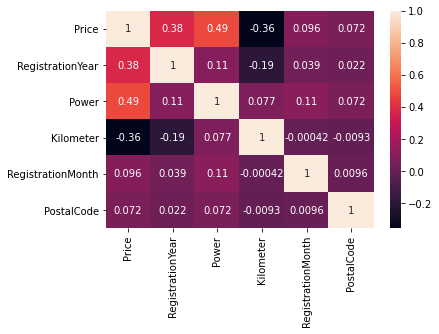

In [25]:
sns.heatmap(df.corr(), annot=True);

Видим, что между собой признаки коррелируют слабо, но на стоимость больше всего влияют `Power`, `RegistrationYear` и `Kilometer`. Что касается года регистрации и пробега, то зависимость интуитивна - чем больше год регистрации, тем моложе и дороже автомобиль. Чем больше пробег - тем автомобиль дешевле. Однако зависимость от мощности неожиданна, причём достаточно сильная.  

### Выводы

Файл открылся без проблем, колонки соответствуют заявленным. Были выявлены некоторые незначащие признаки, которые были удалены из датасета. Также были удалены записи с явными аномальными значениями в целевом признаке.

## Обучение моделей

Для моделирования используем следующие модели:
- RandomForesRegressor
- LightGBM
- CatBoost
- LinearRegression

Каждая модель имееь свои особенности. Например для линейной регресии важно использовать масштабирование признаков, а для моделей на основе деревьев - нет. Кроме того не каждая модель работает с пропусками и на прямую с категориальными признаками. Это тоже надо учитывать.

Выделим целевой признак

In [26]:
y = df.pop('Price')

In [27]:
X = df

Разделим фрейм на тестовую и тренировочную выборку, чтобы проводить кросс-валидацию моделей, а затем сравним модели на тестовой выборке.

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [29]:
len(X_train), len(X_test), len(y_train), len(y_test)

(273592, 68399, 273592, 68399)

Для работы моделей понадобится заполнение пропусков. Используем `SimpleImputer` и заполнм пропуски строкой *None*, так как у нас пропуски в категориальных значениях.

In [30]:
imputer = SimpleImputer(strategy='constant', fill_value='None')

Для преобразования категориальных переменных в числовые, используем `OneHotEncoder`

In [31]:
ohe = OneHotEncoder(handle_unknown='ignore')

Количество батчей для кросс-валидации зададим 4 

In [32]:
CV=4

Модели будем записывать в словарь

In [33]:
models={}

### Случайный лес

Создадим пайплайн для модель случайного леса. Туда включим заполнение пропусков, кодирование катеогриальных переменных и саму модель случайного леса. Чтобы ускорить работу модели, количество деревьев зададим 100, а глубину будем задавать небольшую (5, 7, 9). Такие же параметры зададим и для других алгоритмов.

In [34]:
forest_model = RandomForestRegressor(random_state=42, n_estimators=10)

In [35]:
forest_pipeline = Pipeline(steps=[
    ('imputer', imputer),
    ('onehot', ohe),
    ('model', forest_model)
])

Для перебора параметров будем использовать `GridSearch`. Зададим параметры

In [36]:
param_grid={'model__max_depth':[5, 7, 9]}

Запустим `GridSearch`. Установим к-во фолдов для сросс-валидации CV. Скоринг - *neg_mean_squared_error*.

In [37]:
forest_grid_search = GridSearchCV(forest_pipeline, param_grid, cv=CV, scoring='neg_mean_squared_error', verbose=1,n_jobs=-1)

In [38]:
forest_grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 3 candidates, totalling 12 fits


GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('imputer',
                                        SimpleImputer(fill_value='None',
                                                      strategy='constant')),
                                       ('onehot',
                                        OneHotEncoder(handle_unknown='ignore')),
                                       ('model',
                                        RandomForestRegressor(n_estimators=10,
                                                              random_state=42))]),
             n_jobs=-1, param_grid={'model__max_depth': [5, 7, 9]},
             scoring='neg_mean_squared_error', verbose=1)

Получим результаты и представим их как *DataFrame*

In [39]:
pd.DataFrame(forest_grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,9.507780,0.190028,0.591530,0.105265,5,{'model__max_depth': 5},-1.180836e+07,-1.177420e+07,-1.173420e+07,-1.157413e+07,-1.172272e+07,89716.479978,3
1,21.473277,2.941715,0.783612,0.170818,7,{'model__max_depth': 7},-1.007662e+07,-1.005866e+07,-1.005084e+07,-9.847527e+06,-1.000841e+07,93356.805404,2
2,29.637664,1.356557,0.561151,0.080281,9,{'model__max_depth': 9},-8.586445e+06,-8.555006e+06,-8.470879e+06,-8.396232e+06,-8.502140e+06,74323.398231,1


Из таблицы видно, что с увеличением глубины, *MSE* на кросс валидации-улучшается, но увеличивается и время обучения

Лучший результат следующий *(-MSE)*

In [42]:
forest_grid_search.best_score_

-8502140.477653844

Лучшая модель случайного леса имеет следующие параметры.

In [43]:
forest_grid_search.best_estimator_

Pipeline(steps=[('imputer',
                 SimpleImputer(fill_value='None', strategy='constant')),
                ('onehot', OneHotEncoder(handle_unknown='ignore')),
                ('model',
                 RandomForestRegressor(max_depth=9, n_estimators=10,
                                       random_state=42))])

Была выбрана модель с глубиной 9. Запишем модель в словарь для финального анализа

In [44]:
models={'forest':forest_grid_search.best_estimator_}

### LightGBM

Следующим алгоритмом используем `LightGBM`. Он может работать с пропусками, но для работы с категориальными данными ему необходимо пробразовать тип из *object* в *category*. Для преобразования определим столбцы со строковым типом.

In [45]:
cat_features = list(X_train.select_dtypes('object').columns)

In [46]:
cat_features

['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand', 'NotRepaired']

Определим функцию для преобразования типа

In [47]:
def to_category(x):
    df_copy=x.copy()
    df_copy[cat_features] =df_copy[cat_features].astype('category')
    return pd.DataFrame(df_copy)

Для использования в пайплайне возьмём `FunctionTransformer`

In [48]:
fun_tr = FunctionTransformer(to_category, validate=False)

Создадим модель регрессора на основе `LGBMRegressor`

In [49]:
lgbm_model = LGBMRegressor(random_state=42, metric='rmse', n_estimators=10, zero_as_missing=False)

Создадим пайплайн, который сначала преобразует тип в категорию, а затем использует модель

In [50]:
lgbm_pipeline = Pipeline(steps=[
    ('fun_tr', fun_tr),
    ('model', lgbm_model)
])

Параметры для GridSearch оставим такие же

In [51]:
param_grid

{'model__max_depth': [5, 7, 9]}

In [52]:
lgmb_grid_search = GridSearchCV(lgbm_pipeline, param_grid, cv=CV, scoring='neg_mean_squared_error', verbose=1,n_jobs=-1)

In [53]:
lgmb_grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 3 candidates, totalling 12 fits


GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('fun_tr',
                                        FunctionTransformer(func=<function to_category at 0x7f3a1cf54550>)),
                                       ('model',
                                        LGBMRegressor(metric='rmse',
                                                      n_estimators=10,
                                                      random_state=42,
                                                      zero_as_missing=False))]),
             n_jobs=-1, param_grid={'model__max_depth': [5, 7, 9]},
             scoring='neg_mean_squared_error', verbose=1)

Получим результаты

In [54]:
pd.DataFrame(lgmb_grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,34.990419,0.130106,0.227527,0.033864,5,{'model__max_depth': 5},-6.813803e+06,-6.942692e+06,-6.775993e+06,-6.783814e+06,-6.829076e+06,67097.568284,3
1,43.274547,2.591592,0.255028,0.043125,7,{'model__max_depth': 7},-6.660675e+06,-6.722022e+06,-6.612869e+06,-6.641861e+06,-6.659356e+06,39987.270002,2
2,44.920825,10.711826,0.293915,0.059624,9,{'model__max_depth': 9},-6.664335e+06,-6.719813e+06,-6.594170e+06,-6.635101e+06,-6.653355e+06,45752.852854,1


Из таблицы видно, что также с увеличением глубины, *MSE* на кросс валидации-улучшается, но увеличивается и время обучения. Заметно, что время обучения больше, чем для случайного леса. Однако и метрика лучше.

Лучший результат следующий

In [55]:
lgmb_grid_search.best_score_

-6653354.641572965

Лучшая модель

In [56]:
lgmb_grid_search.best_estimator_

Pipeline(steps=[('fun_tr',
                 FunctionTransformer(func=<function to_category at 0x7f3a1cf54550>)),
                ('model',
                 LGBMRegressor(max_depth=9, metric='rmse', n_estimators=10,
                               random_state=42, zero_as_missing=False))])

Была выбрана модель с глубиной 9. Запишем модель в словарь для финального анализа

In [71]:
models['lightgbm'] = lgmb_grid_search.best_estimator_

### CatBoost

Следующим алгоритмом используем CatBoost. Он может работать с категориями типом *object*. А пропуски надо заполнить. Параметры инициализации модели оставим аналогичные другим моделям.

In [58]:
columns = list(X_train.columns)

Для CatBoost нужен список индексов столбцов, которые будут обрабатываться как категориальные.

In [59]:
cat_features_index = [columns.index(i) for i in cat_features]

In [60]:
cat_features_index

[0, 2, 4, 7, 8, 9]

Создадим модель, параметры примем аналогичные предыдущим моделям.

In [61]:
cat_model =CatBoostRegressor(random_seed=42, num_trees = 10, cat_features = cat_features_index)

Создадим пайплайн с заполнением пропусками и моделью.

In [62]:
cat_pipeline = Pipeline(steps=[
    ('imputer', imputer),
    ('model', cat_model)
])

In [63]:
cat_grid_search = GridSearchCV(cat_pipeline, param_grid, cv=CV, scoring='neg_mean_squared_error')

Запустим поиск

In [64]:
cat_grid_search.fit(X_train, y_train)

Learning rate set to 0.5
0:	learn: 3347.5047912	total: 295ms	remaining: 2.66s
1:	learn: 2705.0214020	total: 525ms	remaining: 2.1s
2:	learn: 2473.5344563	total: 766ms	remaining: 1.79s
3:	learn: 2318.7682974	total: 975ms	remaining: 1.46s
4:	learn: 2216.0639850	total: 1.19s	remaining: 1.19s
5:	learn: 2160.9992805	total: 1.39s	remaining: 925ms
6:	learn: 2109.4002841	total: 1.6s	remaining: 685ms
7:	learn: 2079.3502885	total: 1.8s	remaining: 450ms
8:	learn: 2054.8150634	total: 1.97s	remaining: 219ms
9:	learn: 2030.1112661	total: 2.16s	remaining: 0us
Learning rate set to 0.5
0:	learn: 3339.0370768	total: 205ms	remaining: 1.85s
1:	learn: 2704.3910924	total: 425ms	remaining: 1.7s
2:	learn: 2443.1537661	total: 639ms	remaining: 1.49s
3:	learn: 2289.3451298	total: 819ms	remaining: 1.23s
4:	learn: 2211.3455568	total: 1s	remaining: 1s
5:	learn: 2139.6733824	total: 1.27s	remaining: 849ms
6:	learn: 2102.8835988	total: 1.45s	remaining: 622ms
7:	learn: 2075.4462053	total: 1.63s	remaining: 408ms
8:	learn

GridSearchCV(cv=4,
             estimator=Pipeline(steps=[('imputer',
                                        SimpleImputer(fill_value='None',
                                                      strategy='constant')),
                                       ('model',
                                        <catboost.core.CatBoostRegressor object at 0x7f3a041cd5e0>)]),
             param_grid={'model__max_depth': [5, 7, 9]},
             scoring='neg_mean_squared_error')

In [65]:
pd.DataFrame(cat_grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,4.455328,0.447949,0.390228,0.083266,5,{'model__max_depth': 5},-4.210794e+06,-4.144606e+06,-4.184615e+06,-4.117700e+06,-4.164429e+06,35825.243016,3
1,5.404737,0.567815,0.393202,0.083093,7,{'model__max_depth': 7},-3.804447e+06,-3.763295e+06,-3.775696e+06,-3.712808e+06,-3.764062e+06,33143.039079,2
2,5.945984,0.444804,0.397263,0.080788,9,{'model__max_depth': 9},-3.579869e+06,-3.496008e+06,-3.456762e+06,-3.489274e+06,-3.505478e+06,45440.971315,1


Из таблицы видно, что также с увеличением глубины, MSE на кросс валидации-улучшается, но увеличивается и время обучения. Заметно, что время обучения меньше, чем для случайного леса и LightGBM и метрика лучше.

Лучший результат следующий (*-MSE*)

In [69]:
cat_grid_search.best_score_

-3505478.1521312087

Лучшая модель - с глубиной 9

In [70]:
cat_grid_search.best_estimator_

Pipeline(steps=[('imputer',
                 SimpleImputer(fill_value='None', strategy='constant')),
                ('model',
                 <catboost.core.CatBoostRegressor object at 0x7f3a1cedf9a0>)])

Запишем модель в словарь для финального анализа

In [73]:
models['catboost'] = cat_grid_search.best_estimator_

### Линейная регрессия

Для линейной регрессии дополнительно проведём масштабирование признаков с помощью `StandardScaler`.

In [74]:
scaler = StandardScaler()

Содадим модель линейной регресии

In [75]:
linear_model = LinearRegression()

In [152]:
num_features = X.select_dtypes('int').columns

In [153]:
num_features

Index(['RegistrationYear', 'Power', 'Kilometer', 'RegistrationMonth',
       'PostalCode'],
      dtype='object')

Создадим пайплайн, с заполнением пропускров, кодированием признаков, масштабированием и моделью.

In [76]:
linear_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='None')),
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
    ('scaler', StandardScaler(with_mean=False)),
    ('linear_model', LinearRegression())
])

Линейную регресиию используем как есть, без подбора параметров. Засечём время обучения. 

In [77]:
result = %timeit -n1 -r1 -o linear_pipeline.fit(X_train, y_train)

15.7 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


Время обучения довольно неплохое - 15,7 сек. Посмотрим на метрику. Пока используем метрику как и для других моделей (*-MSE*)

In [79]:
-mean_squared_error(y_test, linear_pipeline.predict(X_test))

-4173472.3093374744

Метрика тоже неплоха. Посмотрим, что покажут результаты на финальном анализе.

Запишем в словарь для финального анализа

In [78]:
models['linear_regression'] = linear_pipeline

### Выводы

В результате сравнили следующие модели:
- RandomForesRegressor
- LightGBM
- CatBoost
- LinearRegression

Каждая модель имеет свои особенности, поэтому для каждой понадобился свой отдельный пайплайн подготавливающий данные и обучающий модели. Сравнили результаты для некоторых вариантов параметра `max_depth`. Другие параметры не изменяли, чтобы не увеличивать время расчёта. Лучший результат показала модель `Catboost`. 

## Анализ моделей

В результате получили для анализа следующий словарь моделей

In [80]:
models

{'forest': Pipeline(steps=[('imputer',
                  SimpleImputer(fill_value='None', strategy='constant')),
                 ('onehot', OneHotEncoder(handle_unknown='ignore')),
                 ('model',
                  RandomForestRegressor(max_depth=9, n_estimators=10,
                                        random_state=42))]),
 'lightgbm': Pipeline(steps=[('fun_tr',
                  FunctionTransformer(func=<function to_category at 0x7f3a1cf54550>)),
                 ('model',
                  LGBMRegressor(max_depth=9, metric='rmse', n_estimators=10,
                                random_state=42, zero_as_missing=False))]),
 'catboost': Pipeline(steps=[('imputer',
                  SimpleImputer(fill_value='None', strategy='constant')),
                 ('model',
                  <catboost.core.CatBoostRegressor object at 0x7f3a1cedf9a0>)]),
 'linear_regression': Pipeline(steps=[('imputer',
                  SimpleImputer(fill_value='None', strategy='constant')),
      

Теперь проведём финальный анализ выбранных моделей. Для этого будем замерять время и качество (*RMSE*) обучения на тренировочной выборке и на тестовой. Результаты сведём в датафрейм для удобства восприятия

In [82]:
df_result = pd.DataFrame({'model':[], 'train_time':[], 'train_rmse':[], 'test_time':[], 'test_rmse':[]})

In [83]:
for model_name in models:
    train_time = %timeit -n1 -r1 -o models[model_name].fit(X_train, y_train)
    train_rmse = mean_squared_error(y_train, models[model_name].predict(X_train))**0.5
    test_time = %timeit -n1 -r1 -o models[model_name].fit(X_train, y_train)
    test_rmse = mean_squared_error(y_test, models[model_name].predict(X_test))**0.5
    res_dict={'model':model_name, 'train_time':train_time.best, 'train_rmse':train_rmse, 'test_time':test_time.best, 'test_rmse':test_rmse}
    df_result=df_result.append(res_dict, ignore_index=True)

42.7 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
42.9 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
59.5 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
43.8 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
Learning rate set to 0.5
0:	learn: 3133.5881929	total: 565ms	remaining: 5.08s
1:	learn: 2517.5143927	total: 1.1s	remaining: 4.4s
2:	learn: 2223.6469770	total: 1.65s	remaining: 3.85s
3:	learn: 2085.2351613	total: 2.14s	remaining: 3.21s
4:	learn: 1986.8557866	total: 2.62s	remaining: 2.62s
5:	learn: 1937.9983236	total: 3.1s	remaining: 2.07s
6:	learn: 1908.6042403	total: 3.58s	remaining: 1.53s
7:	learn: 1884.2532402	total: 4.05s	remaining: 1.01s
8:	learn: 1870.2273222	total: 4.52s	remaining: 502ms
9:	learn: 1853.1128694	total: 4.99s	remaining: 0us
8.3 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
Learning rate set to 0.5
0:	learn: 3133.5881929	total: 468ms	remaining: 4.21s
1:	learn: 2517.5143927	total: 923ms	remaining: 3.69s


Выведем результаты, отсортированные по метрике на тестовой выборке

In [85]:
df_result.sort_values(by='test_rmse')

,model,train_time,train_rmse,test_time,test_rmse
2,catboost,8.298799,1847.622224,8.502440,1850.991141
3,linear_regression,17.424325,1977.424053,16.241190,2042.907807
1,lightgbm,59.463369,2572.564985,43.793672,2544.893756
0,forest,42.745433,2887.389047,42.889614,2884.597171


### Выводы
В результате анализа установили, что модель на основе `CatBoost` имеет лучшую скорость и лучшую метрику как на тренировочной, так и на тестовой выборке. Далее в порядке убывания метрики расположились - `LinearRegression`, `LightGBM` и `RandomForest`.
Линейная регрессия обошла алгоритм LightGBM по скорости и по точности, но вероятно для датасетов с большим к-вом признаков линейная регрессия проиграет по времени. Кроме того, метрики качества на тренировочной и тестовой выборке у моделей отличаются незначительно (кроме регрессии) - следовательно переобучения не произошло.

## Общие выводы
- В ходе работы провели анализ исходных данных - обпределили и удалили дубликаты и незначащие признаки. Удалили явные выбросы и проверили признаки на мультиколлинеарность
- Обучили модели (`RandomForestRegressor`, `LGBMRegressor`, `CatBoostRegressor`, `LinearRegression`). Для некоторых пришлось заполнить пропуски (так как не все модели работают с пропусками), преобразовать категориальные данные для работы моделей (не все модели могут работать с пропусками)
- Выполнили решётчатые поиск оптимального параметра `max_depth` для не-регрессий. Для сокращения времени выполнения ограничились к-вом деревьев 10 и глубиной 5,7,9
- Провели анализ работы моделей:
    - Оценили время работы моделей с лучшими параметрами
    - Оценили время обучения лучших моделей на тренировочной и тестовой выборках
    - Оценили качество обучения метрикой *RMSE* на тренировочной и тестовой выборках
    
По результатам анализа можно рекомендовать использовать модель на основе `CatBoostRegressor` как наилучшую из выбранных как по метрике *RMSE*, так и по времени обучения.

